##### Notebook analyzing vehicle registrations in the Metropolitan Area

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

El Fondo Metropolitano del Valle de México refiere a la Zona Metropolitana que conforman las 16 delegaciones de la Ciudad de México, 59 municipios del Estado de México y un municipio del Estado de Hidalgo.

In [3]:
zm = pd.read_excel('data/ZM_13.xlsx', sheetname='Hoja3', converters={'CODE': str})

In [4]:
zm_codes = zm['CODE'].tolist()

In [5]:
# Data dictionary
data_dict = pd.read_csv('data/cars/diccionario_de_datos/diccionario_de_datos.csv')

In [6]:
cols = ['AUTO_OFICIAL', 'AUTO_PUBLICO', 'AUTO_PARTICULAR', 'CAM_PAS_OFICIAL', 'CAM_PAS_PUBLICO', 'CAM_PAS_PARTICULAR',
        'CYC_CARGA_OFICIAL', 'CYC_CARGA_PUBLICO', 'CYC_CARGA_PARTICULAR', 'MOTO_OFICIAL', 'MOTO_DE_ALQUILER', 'MOTO_PARTICULAR']

In [7]:
pd.options.display.max_colwidth = 400

In [8]:
for c in cols:
    descr = data_dict[data_dict['Columna'] == c]['Descripción'].values[0]
    print(c)
    print(descr)
    print("\n")

AUTO_OFICIAL
Comprende los vehículos a motor destinados principalmente al transporte de personas, que tengan hasta 7 asientos (incluyendo el del chofer). Es el transporte de pasajeros y/o carga que es utilizado por organismos gubernamentales para satisfacer sus propios requerimientos y/o atender necesidades de la población.


AUTO_PUBLICO
Comprende los vehículos a motor destinados principalmente al transporte de personas, que tengan hasta 7 asientos (incluyendo el del chofer). Es el servicio que prestan las personas físicas y morales al público en general, para el traslado de pasajeros y bienes a diferentes lugares del país, utilizando los caminos y puentes de Jurisdicción Federal, mediante una concesión otorgada por la Secretaría de Comunicaciones y Transportes. La concesión para la prestación de este tipo de servicio para el caso del servicio federal y para el servicio estatal es otorgada por los gobiernos de los estados.


AUTO_PARTICULAR
Comprende los vehículos a motor destinados a

In [9]:
summary = {}

In [10]:
for y in range(1980, 2015):
        summary[y] = {}
        df = pd.read_csv("data/cars/conjunto_de_datos/tr_cifra_{}.csv".format(y), error_bad_lines=False)
        df['ID_ENTIDAD'] = df['ID_ENTIDAD'].astype(str)
        df['ID_MUNICIPIO'] = df['ID_MUNICIPIO'].astype(str)
        df['ID_MUNICIPIO'] = df['ID_MUNICIPIO'].str.zfill(3)
        df['CODE'] = df['ID_ENTIDAD'] + df['ID_MUNICIPIO']
        sub = df[(df['CODE'].isin(zm_codes)) & (df['ID_ESTATUS_CIFRA'] == 1)].copy()
        cols = ['AUTO_OFICIAL', 'AUTO_PUBLICO', 'AUTO_PARTICULAR', 'CAM_PAS_OFICIAL', 'CAM_PAS_PUBLICO', 'CAM_PAS_PARTICULAR', 'CYC_CARGA_OFICIAL', 'CYC_CARGA_PUBLICO', 'CYC_CARGA_PARTICULAR', 'MOTO_OFICIAL', 'MOTO_DE_ALQUILER', 'MOTO_PARTICULAR']
        sub[cols] = sub[cols].apply(lambda c: pd.to_numeric(c, errors='coerce'))
        sub['TOTAL'] = sub[cols].sum(axis=1)
        cols.append('TOTAL')
        for c in cols:
            total = sub[c].sum()
            summary[y][c] = total

b'Skipping line 336: expected 17 fields, saw 25\nSkipping line 792: expected 17 fields, saw 25\nSkipping line 941: expected 17 fields, saw 25\nSkipping line 1638: expected 17 fields, saw 25\nSkipping line 2244: expected 17 fields, saw 25\n'


In [11]:
rv = pd.DataFrame(summary).T

In [12]:
rv['AUTO'] = rv[['AUTO_OFICIAL', 'AUTO_PARTICULAR', 'AUTO_PUBLICO']].sum(axis=1)
rv['PUB_TRANS'] = rv[['CAM_PAS_OFICIAL', 'CAM_PAS_PUBLICO', 'CAM_PAS_PARTICULAR']].sum(axis=1)
rv['HGVT'] = rv[['CYC_CARGA_OFICIAL', 'CYC_CARGA_PUBLICO', 'CYC_CARGA_PARTICULAR']].sum(axis=1)
rv['MOTO'] = rv[['MOTO_OFICIAL', 'MOTO_DE_ALQUILER', 'MOTO_PARTICULAR']].sum(axis=1)

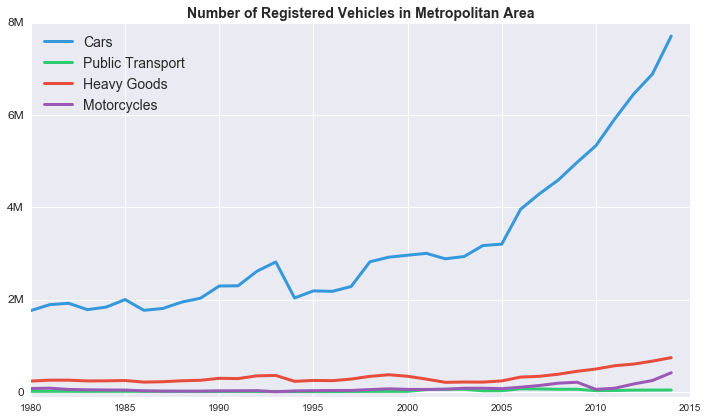

In [13]:
labels = ('Cars', 'Public Transport', 'Heavy Goods', 'Motorcycles')
colors = ('#3498db', '#2ecc71', '#e74c3c', '#9b59b6')
fig, ax = plt.subplots(figsize=(10, 6))

for i, t in enumerate(('AUTO', 'PUB_TRANS', 'HGVT', 'MOTO')):
    x = rv[t].index
    y = rv[t].values
    ax.plot(x, y, linewidth=3, label=labels[i], color=colors[i])

ax.set_ylim(-100000, 8000000)
ax.set_yticks([0, 2e6, 4e6, 6e6, 8e6])
ax.set_yticklabels(['0', '2M', '4M', '6M', '8M'], fontsize=12)
#ax.get_xticklabels(fontsize=12)

ax.set_title('Number of Registered Vehicles in Metropolitan Area', fontsize=14, weight='bold')
ax.legend(loc=0, fontsize=14)
plt.tight_layout()

plt.savefig('img/pol1_num_vehicles.png')

In [14]:
def cagr(v_end, v_start, t):
    return (v_end/v_start)**(1/t) - 1

In [21]:
print("1980: {}".format(rv.loc[1980]['AUTO']))
print("2005: {}".format(rv.loc[2005]['AUTO']))
print("2014: {}".format(rv.loc[2014]['AUTO']))

1980: 1767539.0
2005: 3205192.0
2014: 7709676.0


In [24]:
(rv.loc[2005]['AUTO'] - rv.loc[1980]['AUTO'])/15

95843.53333333334

In [28]:
(rv.loc[2014]['AUTO'] - rv.loc[2005]['AUTO'])/15

300298.93333333335

In [30]:
print("Annual growth rate between 1980 and 2005 {}".format(cagr(rv.loc[2005]['PUB_TRANS'], rv.loc[1980]['PUB_TRANS'], 25) * 100))

Annual growth rate between 1980 and 2005 2.4269636513074344


In [29]:
print("Annual growth rate between 2005 and 2014 {}".format(cagr(rv.loc[2014]['PUB_TRANS'], rv.loc[2005]['PUB_TRANS'], 9) * 100))

Annual growth rate between 2005 and 2014 4.438677861792484


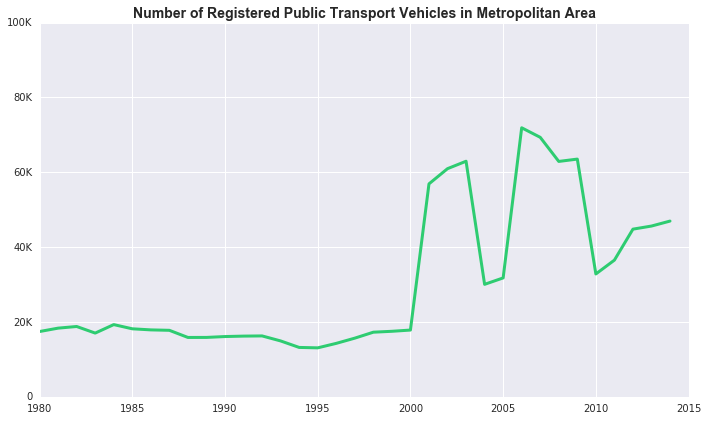

In [252]:
fig, ax = plt.subplots(figsize=(10, 6))
x = rv['PUB_TRANS'].index
y = rv['PUB_TRANS'].values

ax.plot(x, y, linewidth=3, color='#2ecc71')
ax.set_ylim(0, 100000)
ax.set_yticks([0, 2e4, 4e4, 6e4, 8e4, 10e4])
ax.set_yticklabels(['0', '20K', '40K', '60K', '80K', '100K'])

ax.set_title('Number of Registered Public Transport Vehicles in Metropolitan Area', fontsize=14, weight='bold')

plt.tight_layout()
plt.savefig('img/pol1_public_transport.png')

In [262]:
# Percentage increases
print("Cars grew {}".format(rv.loc[2014]['AUTO'] / rv.loc[1980]['AUTO'] * 100))
print("Public Transport grew {}".format(rv.loc[2014]['PUB_TRANS'] / rv.loc[1980]['PUB_TRANS'] * 100))

Cars grew 436.18137987337195
Public Transport grew 269.2215088282504
